In [11]:
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from atlas_ml.datasets.data_pipeline import DataPipeline
from atlas_ml.deeplearning.vae import VAE

### Basic example on MNIST

In [2]:
vae = VAE(img_size=28, input_channels=1, output_channels=1)
dataset_config = {'batch_size':128, 'val_split':0.2, 'num_workers':2, 'pin_memory':True}
train_dl, val_dl = DataPipeline(configs=dataset_config).get_dataset() # default is mnist

In [3]:
vae.train_model(
    train_dataloader=train_dl,
    val_dataloader=val_dl,
    optimizer=torch.optim.Adam,
    criterion=nn.MSELoss,
    epochs=10,
    lr=3e-4,
    device='cuda'
)

  0%|          | 0/10 [00:00<?, ?it/s]

### Visualise Reconstructed Images

Text(0.5, 1.0, 'After 5 Epochs')

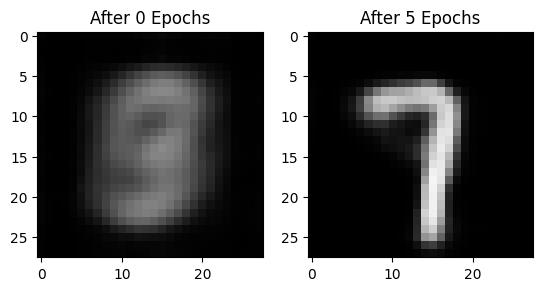

In [19]:
img_epoch_0 = cv2.imread(r'C:\Users\tommy\Developer\atlas-ml\atlas_ml\deeplearning\notebooks\sample_0.png')
img_epoch_5 = cv2.imread(r'C:\Users\tommy\Developer\atlas-ml\atlas_ml\deeplearning\notebooks\sample_5.png')

_, ax = plt.subplots(1,2)
ax[0].imshow(img_epoch_0)
ax[0].set_title('After 0 Epochs')
ax[1].imshow(img_epoch_5)
ax[1].set_title('After 5 Epochs')